# Calculate probabilistic coefficients

In this tutorial we take a look at how to generate distributions of stellar limb-darkening coefficients, most likley to be used as priors in your data analysis.

In [1]:
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from exotic_ld import StellarLimbDarkening


# "path/to/exotic_ld_data".
ld_data_path = os.environ["exotic_ld_data"]

First, instantiate the StellarLimbDarkening class.

In [2]:
sld = StellarLimbDarkening(M_H=0.01, Teff=5512, logg=4.47, 
                           ld_model="mps1", 
                           ld_data_path=ld_data_path)

Next, compute the stellar limb-darkening coefficients for a specified limb-darkening law, instrument mode, and wavelength range. Note that we have set return_sigmas=True. This options returns the standard deviation of the uncertainty distribution for each limb-darkening coefficient from the fitting algorithm.

In [8]:
us, us_sigmas = sld.compute_4_parameter_non_linear_ld_coeffs(wavelength_range=[20000., 30000.], 
                                                             mode="JWST_NIRSpec_prism",
                                                             return_sigmas=True)

for u_idx, u, u_sigma in zip(range(1, 5), us, us_sigmas):
    print("u_{}={}+-{}".format(u_idx, round(u, 4), round(u_sigma, 4)))

u_1=0.4917+-0.0088
u_2=0.1334+-0.0216
u_3=-0.3276+-0.0225
u_4=0.1315+-0.0085


You can visualise this distribution as follows

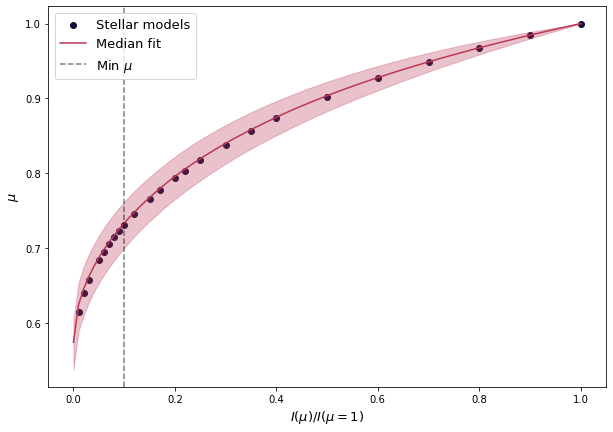

In [15]:
from exotic_ld.ld_laws import nonlinear_4param_ld_law


# Sample ld-coeff distributions.
n_mc_samples = 1000
check_mus = np.linspace(0., 1., 100)
us_dist = np.random.normal(loc=us, scale=us_sigmas, size=(n_mc_samples, len(us)))
I_mu = nonlinear_4param_ld_law(check_mus[..., np.newaxis], 
                               us_dist[:, 0], us_dist[:, 1],
                               us_dist[:, 2], us_dist[:, 3])

# Get 16th, 50th, 84th percentiles.
I_mu_16, I_mu_50, I_mu_84 = np.percentile(I_mu, [16., 50., 84.], axis=1)

plt.figure(figsize=(10, 7))
plt.scatter(sld.mus, sld.I_mu, color=cm.inferno(0.1), label="Stellar models")
plt.plot(check_mus, I_mu_50, color=cm.inferno(0.5), label="Median fit")
plt.fill_between(check_mus, I_mu_16, I_mu_84, color=cm.inferno(0.5), alpha=0.3)
plt.axvline(0.1, ls="--", color=cm.inferno(0.), alpha=0.5, label="Min $\mu$")
plt.xlabel("$I(\mu) / I(\mu=1)$", fontsize=13)
plt.ylabel("$\mu$", fontsize=13)
plt.legend(loc="upper left", fontsize=13)
plt.show()